In [1]:
!pip install pyLDAvis
import pandas as pd
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 2.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2e6194f0edf4c05b9611102c732831ecd7ef3349f236b7b8e634e20368d1e3f5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7a8a2134ea10352e3ba66c811afe15de55c1391dc299f96345b6a99d9a8f52ad
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [42]:
## opcao de leitura do arquivo direto do nosso diretorio compartilhado no gdrive ##
from google.colab import drive
drive.mount('/content/drive/')
path_drive = '/content/drive/My Drive/IC - Matheus/'
path_datasets = path_drive + 'Datasets/Dados Covid - 27032022/'
path_models = path_drive + 'Códigos/Modelos/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [43]:
dados = pd.read_csv(path_datasets + "HIST_PAINEL_COVIDBR_2020_Parte1_27mar2022.csv",sep=";")
dados.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/02/2020,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/02/2020,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/02/2020,9,210147125.0,2,1,0,0,1.0,1.0,NaN


In [44]:
files = []
for f in os.listdir(path_datasets):
  files.append(path_datasets + f)

files

['/content/drive/My Drive/IC - Matheus/Datasets/Dados Covid - 27032022/HIST_PAINEL_COVIDBR_2021_Parte1_27mar2022.csv',
 '/content/drive/My Drive/IC - Matheus/Datasets/Dados Covid - 27032022/HIST_PAINEL_COVIDBR_2021_Parte2_27mar2022.csv',
 '/content/drive/My Drive/IC - Matheus/Datasets/Dados Covid - 27032022/HIST_PAINEL_COVIDBR_2022_Parte1_27mar2022.csv',
 '/content/drive/My Drive/IC - Matheus/Datasets/Dados Covid - 27032022/HIST_PAINEL_COVIDBR_2020_Parte1_27mar2022.csv',
 '/content/drive/My Drive/IC - Matheus/Datasets/Dados Covid - 27032022/HIST_PAINEL_COVIDBR_2020_Parte2_27mar2022.csv']

In [45]:
df = pd.DataFrame()
for f in files:
  frames = pd.read_csv(f,sep=";")
  df = df.append(frames, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
df.describe(include='object')

,regiao,estado,municipio,nomeRegiaoSaude,data,casosAcumulado
count,4108660,4107595,4071670,4071670,4108660,4108660
unique,6,27,5297,440,762,84147
top,Nordeste,MG,Bom Jesus,CENTRAL,01/01/2021,0
freq,1324851,625036,3655,42398,5620,279749


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4108660 entries, 0 to 4108659
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          object 
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(6), int64(5), object(6)
memory usage: 532.9+ MB


In [48]:
from datetime import datetime


In [49]:
df['data'] = df['data'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())

In [60]:
brasil = df[df['regiao'] == 'Brasil']
resumo = brasil.groupby(by=['data'],as_index=False)['casosNovos','obitosNovos'].sum()
resumo['data2']=pd.to_datetime(df['data'])
#resumo['DateTime'] = pd.to_datetime(resumo['data'])
#resumo['Semana'] = resumo['DateTime'].dt.to_period('W-THU')
#resumo = df.groupby(by=['Semana', 'Nome'])['Nome', 'Count', 'Data'].sum()
resumo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,data,casosNovos,obitosNovos,data2
0,2020-02-25,0,0,2021-01-01
1,2020-02-26,1,0,2021-01-01
2,2020-02-27,0,0,2021-01-02
3,2020-02-28,0,0,2021-01-02
4,2020-02-29,1,0,2021-01-03
...,...,...,...,...
757,2022-03-23,47376,302,2021-02-03
758,2022-03-24,37690,312,2021-02-04
759,2022-03-25,34576,256,2021-02-05
760,2022-03-26,29922,196,2021-02-06


In [88]:
resumo['Semana'] = 1
count = 1
for i in range(6,len(resumo),7):
  count = count +1
  for j in range(i,i+7):
    if j == len(resumo):
      break
    else:
      resumo['Semana'][j] = count
resumoSemana = resumo.groupby(by=['Semana'],as_index=False)['casosNovos','obitosNovos'].sum()
resumoSemana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


,Semana,casosNovos,obitosNovos
0,1,2,0
1,2,23,0
2,3,175,0
3,4,1346,25
4,5,2710,111
...,...,...,...
104,105,559892,4848
105,106,280909,3009
106,107,319763,2935
107,108,261708,2127


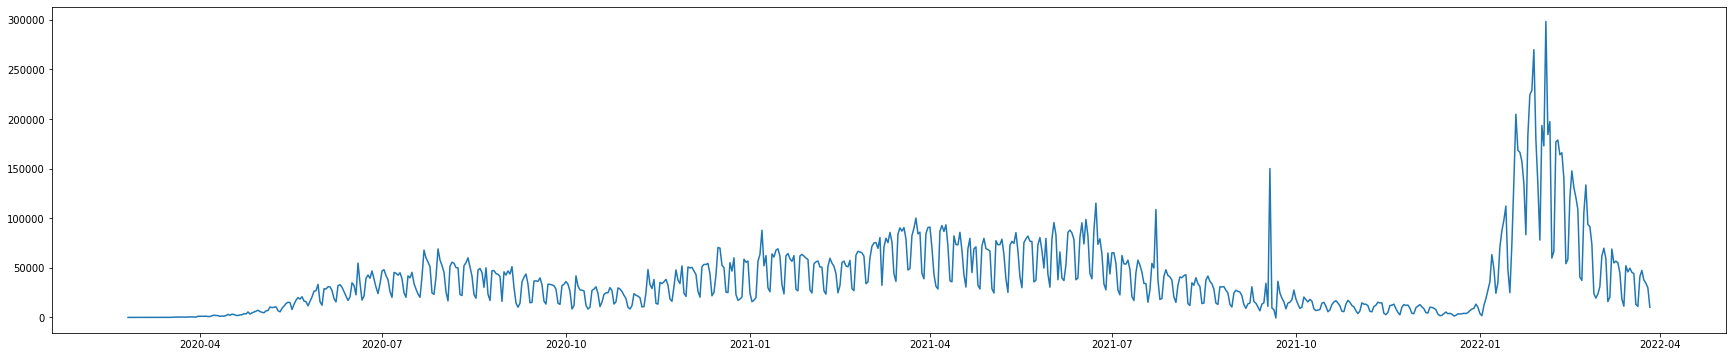

In [85]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(30, 6))  
plt.plot(resumo['data'], resumo['casosNovos'])  
plt.show() 

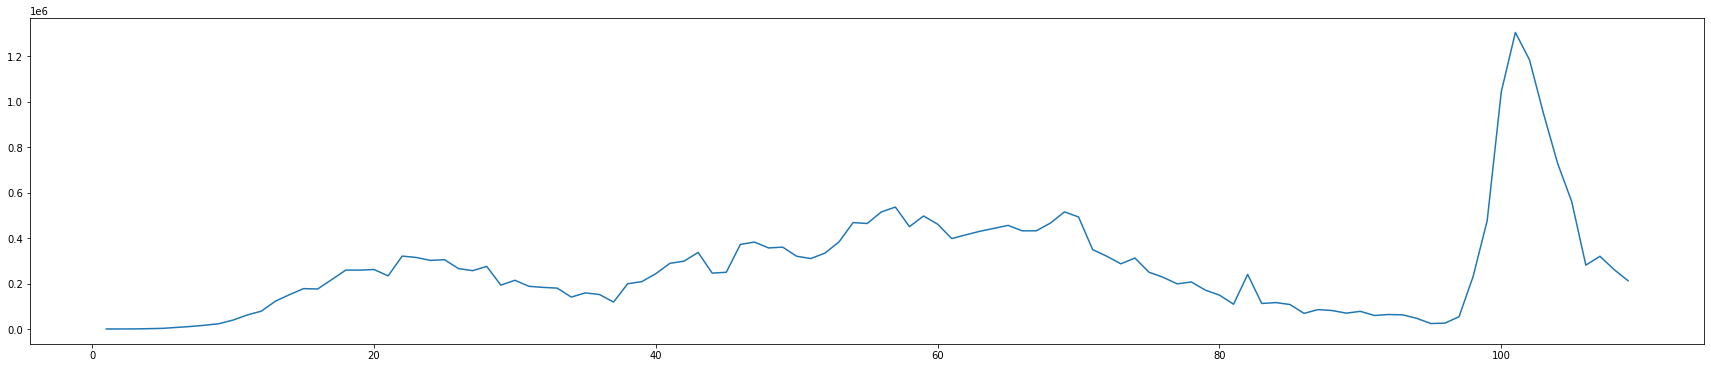

In [90]:
plt.figure(figsize=(30, 6))  
plt.plot(resumoSemana['Semana'], resumoSemana['casosNovos'])  
plt.show() 

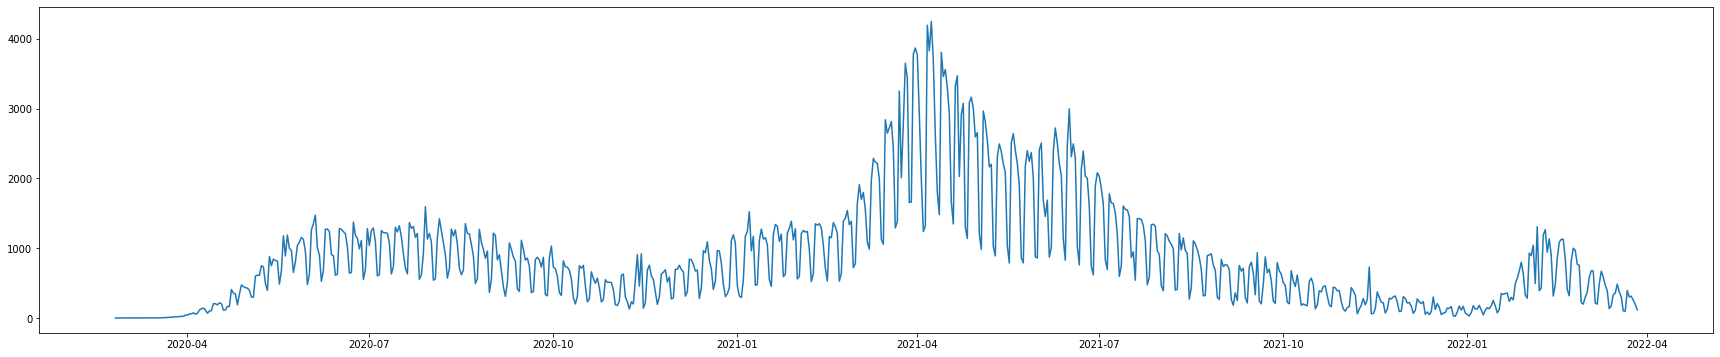

In [91]:
plt.figure(figsize=(30, 6))  
plt.plot(resumo['data'], resumo['obitosNovos'])  
plt.show() 

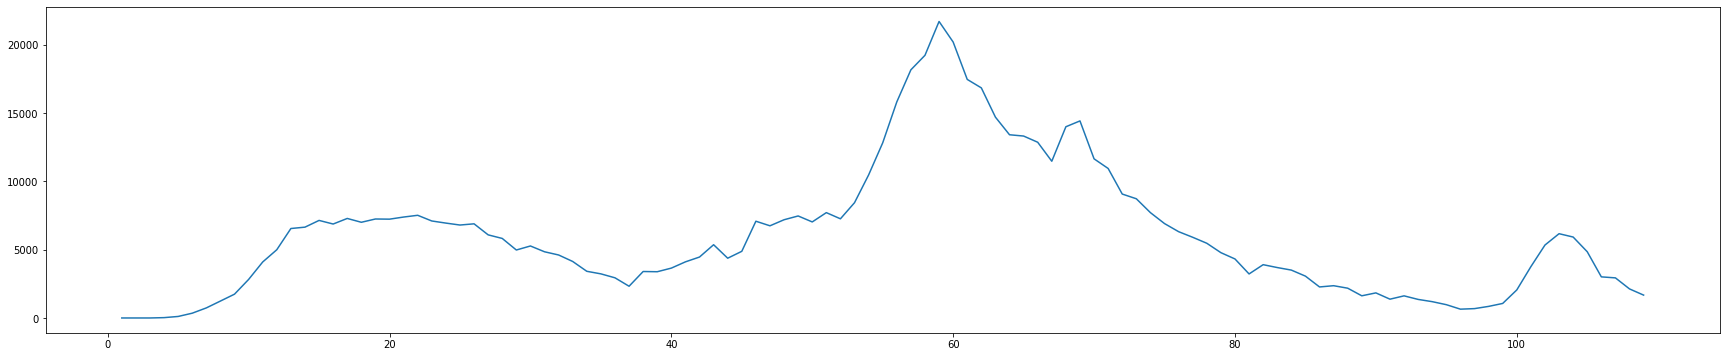

In [92]:
plt.figure(figsize=(30, 6))  
plt.plot(resumoSemana['Semana'], resumoSemana['obitosNovos'])  
plt.show() 

In [96]:
resumoSemana.to_excel(path_models+'CasosObitos_Semana.xlsx', index = False)